In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

2024-05-21 12:36:53.104860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
df = pd.read_csv('train 2.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [62]:
df.shape

(19219, 35)

In [63]:
df.tail()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1
19218,19218,1505,1525,1733458,1733471,182,24,33,22785,98,...,0.5263,-0.1120,0.6619,0,0,0,0,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


In [66]:
df = df.drop('id', axis=1)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [69]:
features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']
labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

In [166]:
X = df[features]
y = df[labels]

In [167]:
y.shape

(19219, 7)

In [71]:
X.TypeOfSteel_A400.value_counts()

TypeOfSteel_A400
1    11461
0     7758
Name: count, dtype: int64

In [72]:
X.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
dtype: object

In [73]:
categorical_cols = ['TypeOfSteel_A300', 'TypeOfSteel_A400']
numerical_cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

In [74]:
from sklearn.manifold import TSNE

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

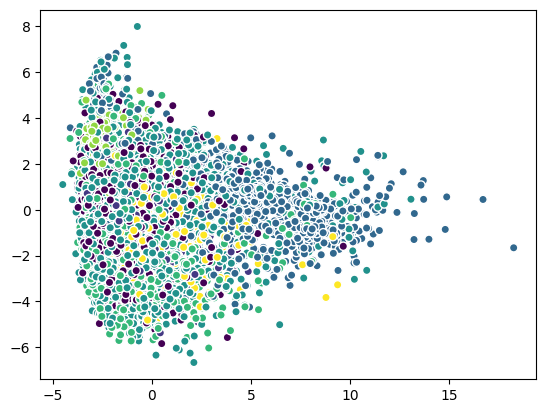

In [173]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

pca__2 = PCA(n_components=2)
pca_data = pca__2.fit_transform(scaled_X)

plt.scatter(pca_data[:,0], pca_data[:,1],c=y_le__, edgecolor = 'white')
plt.show()

In [165]:
tsne_ = TSNE(n_components=2)
tsne_data = tsne_.fit_transform(scaled_X)
scaled_X.shape

(19219, 27)

In [170]:
y_no_encode_ = y.idxmax(axis = 1)
y_no_encode_

0              Stains
1        Other_Faults
2            K_Scatch
3            K_Scatch
4        Other_Faults
             ...     
19214          Stains
19215    Other_Faults
19216          Pastry
19217    Other_Faults
19218           Bumps
Length: 19219, dtype: object

In [171]:

y_le__ = le.fit_transform(y_no_encode_)
y_le__

array([5, 3, 2, ..., 4, 3, 0])

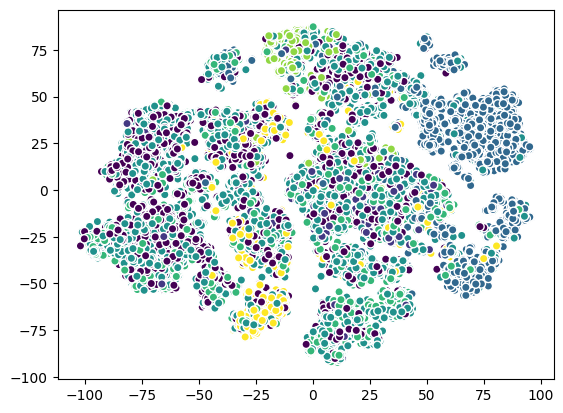

In [172]:
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y_le__,edgecolor = 'white')
plt.show()

In [78]:
rows_to_drop = df[y.sum(axis = 1) == 2]
rows_to_drop.index

Index([  634,   752,  3572,  4416,  4530,  4664,  6448,  7589,  8075,  8538,
        9103,  9388, 10225, 10315, 13318, 13990, 15992, 16307, 17503, 17815,
       17870],
      dtype='int64')

In [79]:
df_ = df.drop(rows_to_drop.index)
df_

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [80]:
for i in labels:
    print(df_[i].value_counts())

Pastry
0    17733
1     1465
Name: count, dtype: int64
Z_Scratch
0    18048
1     1150
Name: count, dtype: int64
K_Scatch
0    15787
1     3411
Name: count, dtype: int64
Stains
0    18630
1      568
Name: count, dtype: int64
Dirtiness
0    18713
1      485
Name: count, dtype: int64
Bumps
0    14437
1     4761
Name: count, dtype: int64
Other_Faults
0    12658
1     6540
Name: count, dtype: int64


In [81]:
df_.shape

(19198, 34)

In [82]:
# pastry, Z_scratch, Stains and Dirtness are under represented

In [83]:
pastry_samp = df_[df_.Pastry == 1].sample(5000, replace = True)
z_samp = df_[df_.Z_Scratch == 1].sample(5000, replace = True)
k_samp = df_[df_.K_Scatch == 1].sample(2000, replace = True)
stains_samp = df_[df_.Stains == 1].sample(5000, replace = True)
dirt_samp = df_[df_.Dirtiness == 1].sample(5000, replace = True)

In [84]:
data = pd.concat([df_,pastry_samp,z_samp,k_samp,stains_samp,dirt_samp])

In [85]:
data.shape

(41198, 34)

In [86]:
for i in labels:
    print(data[i].value_counts())

Pastry
0    34733
1     6465
Name: count, dtype: int64
Z_Scratch
0    35048
1     6150
Name: count, dtype: int64
K_Scatch
0    35787
1     5411
Name: count, dtype: int64
Stains
0    35630
1     5568
Name: count, dtype: int64
Dirtiness
0    35713
1     5485
Name: count, dtype: int64
Bumps
0    36437
1     4761
Name: count, dtype: int64
Other_Faults
0    34658
1     6540
Name: count, dtype: int64


In [87]:
X = data[features]
y = data[labels]

In [89]:
from sklearn.preprocessing import LabelEncoder

In [88]:
categories = y.columns
y_no_encode = y.idxmax(axis = 1)
y_no_encode

0              Stains
1        Other_Faults
2            K_Scatch
3            K_Scatch
4        Other_Faults
             ...     
4915        Dirtiness
11981       Dirtiness
3378        Dirtiness
9814        Dirtiness
14262       Dirtiness
Length: 41198, dtype: object

In [90]:
le = LabelEncoder()
y_le = le.fit_transform(y_no_encode)

In [108]:
y_le.shape

(41198,)

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [98]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_cols)),
    ('scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_cols))
    ])

full_pipline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)])

In [99]:
X_transformed = full_pipline.fit_transform(X)

In [100]:
X_transformed.shape

(41198, 27)

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X, y_le, random_state=42
                                                  ,test_size = 0.15)

In [110]:
X_train.shape, y_train.shape

((35018, 27), (35018,))

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
xgb_clf = GradientBoostingClassifier(random_state=42)

In [113]:
xgb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [114]:
y_val_pred = xgb_clf.predict(X_val)
y_val_pred

array([3, 6, 3, ..., 4, 3, 5])

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [139]:
print(accuracy_score(y_val, y_val_pred))

0.7111650485436893


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rnd_clf = RandomForestClassifier()

In [132]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [133]:
y_val_pred_rnd = rnd_clf.predict(X_val)

In [134]:
accuracy_score(y_val, y_val_pred_rnd)

0.8411003236245954

In [174]:
test = pd.read_csv('test.csv')

In [176]:
test = test.drop('id', axis=1)

In [177]:
test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,1257,1271,419960,419973,370,26,28,39293,92,132,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,1358,1372,117715,117724,289,36,32,29386,101,134,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,158,168,232415,232440,80,10,11,8586,107,140,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,559,592,544375,544389,140,19,15,15524,103,134,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101,1116,447943,447992,313,32,37,21603,79,103,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,1289,1306,3149494,3149542,59,9,18,5249,113,141,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,41,210,1587535,1587191,16584,796,522,1858162,24,143,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,1329,1340,702237,702267,386,43,34,36875,66,124,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844
